In [522]:
# Weather Analysis - PROMICE DATA (for temperatures)

In [523]:
pwd

'C:\\Users\\Nuno Canha\\Desktop\\Python\\Weather\\KAN-M\\test01'

In [524]:
cd C:\Users\Nuno Canha\Desktop\Python\Weather\Analysis\KAN_M

C:\Users\Nuno Canha\Desktop\Python\Weather\Analysis\KAN_M


In [525]:
# Upload the analysis packages

In [526]:
import pandas as pd

In [527]:
import matplotlib.pyplot as plt
from datetime import datetime

In [528]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [529]:
# Loading the data

In [531]:
data = pd.read_csv("input.csv", delimiter=",", usecols=['Year','MonthOfYear', 'DayOfMonth', 'HourOfDay(UTC)','AirTemperature(C)'], na_values=['-999.0'])

# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

In [532]:
data.head()

,Year,MonthOfYear,DayOfMonth,HourOfDay(UTC),AirTemperature(C)
0,2008,9,2,0,NaN
1,2008,9,2,1,NaN
2,2008,9,2,2,NaN
3,2008,9,2,3,NaN
4,2008,9,2,4,NaN


In [10]:
# Parameters of interest to assess its temporal variability: Air Temperature (ºC)

In [11]:
# "Air Temperature (ºC)" stands for Primary air temperature. Measurement height is approximately
# HeightSensorBoom – 0.1m, or 2.6m over bare ice surfaces.
# More information about the dataset is available at 
# https://promice.org/PromiceDataPortal/api/download/f24019f7-d586-4465-8181-d4965421e6eb/v03/monthly/readme+PROMICE+AWS+data.pdf

In [533]:
# To rename the columns' names to simplify the code writting 
new_names={'Year':'year','MonthOfYear':'month','DayOfMonth': 'day', 'HourOfDay(UTC)': 'hours', 'AirTemperature(C)':'Temp' }
data = data.rename(columns=new_names)

In [534]:
type(data)

pandas.core.frame.DataFrame

In [535]:
# Print data types within the Pandas dataframe
data.dtypes

year       int64
month      int64
day        int64
hours      int64
Temp     float64
dtype: object

In [536]:
# Get descritive statistics summary only for "Temp":
data[['Temp']].describe()

,Temp
count,93338.000000
mean,-11.696277
std,10.400843
min,-47.190000
25%,-19.200000
50%,-10.340000
75%,-2.440000
max,7.410000


In [538]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100220 entries, 0 to 100219
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    100220 non-null  int64  
 1   month   100220 non-null  int64  
 2   day     100220 non-null  int64  
 3   hours   100220 non-null  int64  
 4   Temp    93338 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 3.8 MB


In [540]:
# Create a column for the timestamp in a new dataset (with only 2 columns: timestamp and Temp):

In [541]:
data['Date']=pd.to_datetime(data[['year','month','day','hours']])
data1= data[['Date']].join(data[['Temp']])
data1 = data1.set_index('Date')

In [542]:
data1.dtypes

Temp    float64
dtype: object

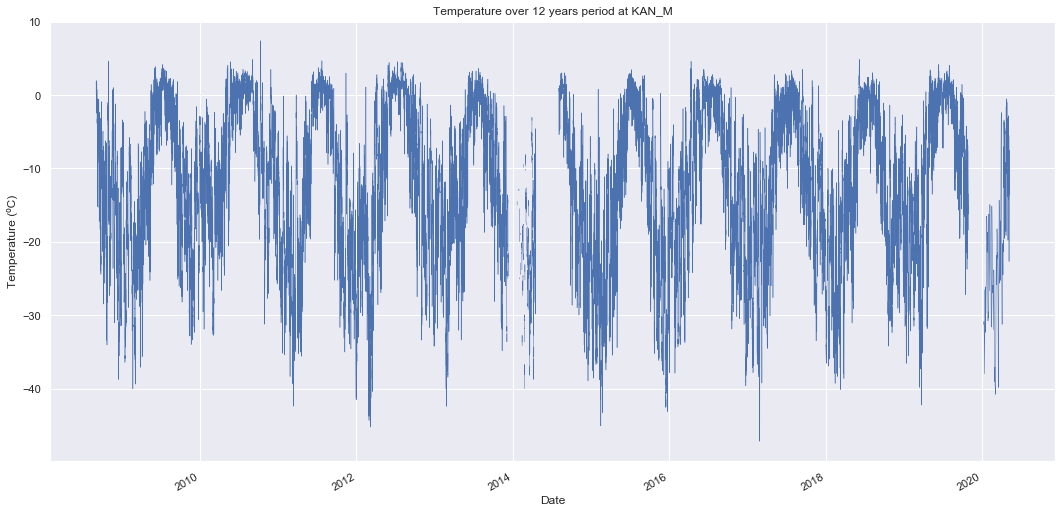

In [543]:
# Add columns with year, month, and weekday name

data1['Year'] = data1.index.year
data1['Month'] = data1.index.month
data1['Day'] = data1.index.day
data1['Hour'] = data1.index.hour

data1

# Plot of the time series of Temp data:

fig1 = data1['Temp'].plot(linewidth=0.5, title ='Temperature over 12 years period at KAN_M');
fig1.set_xlabel('Date')
fig1.set_ylabel('Temperature (ºC)')
fig1.grid(True)

# To save the figure
plt.savefig('Fig1 - Temperature over 12 years @ KAN_M')

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

In [544]:
# Import seaborn for visualisation tools

import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

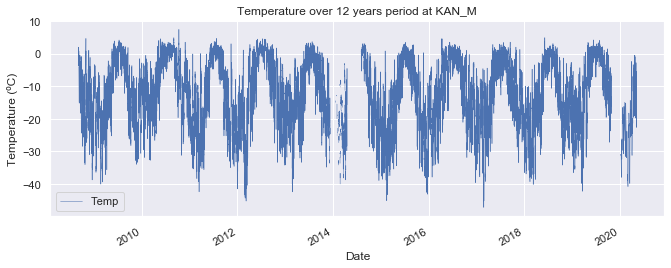

In [546]:
# Let’s create a line plot of the full time series of Temp, using the DataFrame’s plot() method.

fig1a = data.plot('Date', 'Temp', title ='Temperature over 12 years period at KAN_M',linewidth=0.5);
fig1a.set_xlabel('Date')
fig1a.set_ylabel('Temperature (ºC)')
fig1a.grid(True)

# To save the figure
plt.savefig('Fig1A - Temperature over 12 years @ KAN_M')

In [547]:
data1

,Temp,Year,Month,Day,Hour
Date,,,,,
2008-09-02 00:00:00,NaN,2008,9,2,0
2008-09-02 01:00:00,NaN,2008,9,2,1
2008-09-02 02:00:00,NaN,2008,9,2,2
2008-09-02 03:00:00,NaN,2008,9,2,3
2008-09-02 04:00:00,NaN,2008,9,2,4
...,...,...,...,...,...
2020-05-05 19:00:00,-8.86,2020,5,5,19
2020-05-05 20:00:00,-10.68,2020,5,5,20
2020-05-05 21:00:00,-11.42,2020,5,5,21


In [548]:
# Check the statistics of the database:
data1.describe()

,Temp,Year,Month,Day,Hour
count,93338.000000,100220.000000,100220.000000,100220.000000,100220.000000
mean,-11.696277,2013.880503,6.611255,15.716324,11.510557
std,10.400843,3.312386,3.469332,8.802524,6.927803
min,-47.190000,2008.000000,1.000000,1.000000,0.000000
25%,-19.200000,2011.000000,4.000000,8.000000,6.000000
50%,-10.340000,2014.000000,7.000000,16.000000,12.000000
75%,-2.440000,2017.000000,10.000000,23.000000,18.000000
max,7.410000,2020.000000,12.000000,31.000000,23.000000


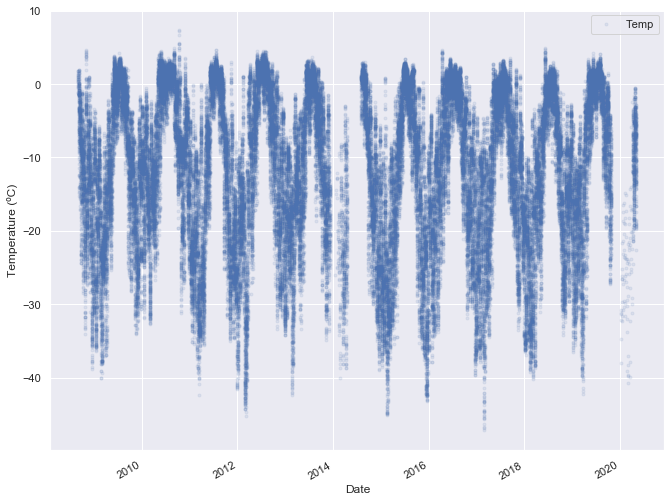

In [550]:
#  We can see that the plot() method has chosen pretty good tick locations (every two years) and labels (the years) for the x-axis, which is helpful.
#  However, with so many data points, the line plot is crowded and hard to read.
#  Let’s plot the data as dots instead, and also look at the Solar and Wind time series.

cols_plot = ['Temp']
axes = data1[cols_plot].plot(marker='.', alpha=0.1, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Temperature (ºC)')
    
# To save the figure
plt.savefig('Fig1B - Temperature over 12 years @ KAN_M')

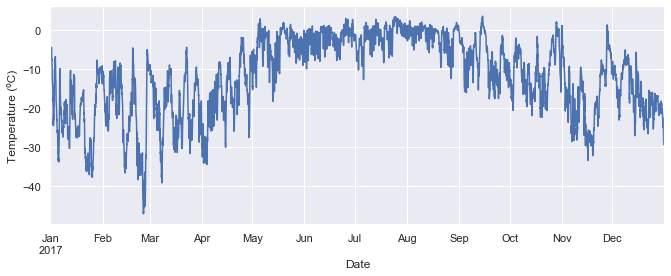

In [552]:
# Seasonality can also occur on other time scales.

# Let’s plot the time series in a single year to investigate further.

ax = data1.loc['2017', 'Temp'].plot()
ax.set_ylabel('Temperature (ºC)');

# To save the figure
plt.savefig('Fig2 - Temperature 2017 @ KAN_M')

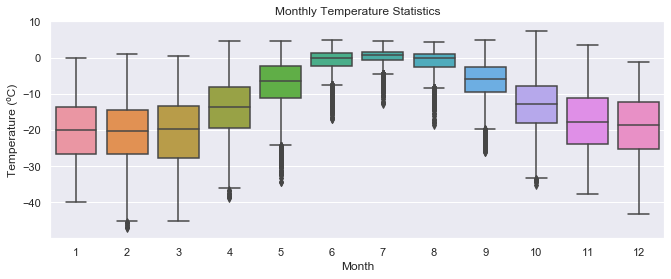

In [554]:
# Next, let’s further explore the seasonality of our data with box plots, using seaborn’s boxplot() 
# function to group the data by different time periods and display the distributions for each group.
# We’ll first group the data by month, to visualize yearly seasonality.
# For more information, check at: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# Monthly Temperature Statistics
ax1 = sns.boxplot(x="Month", y="Temp", data=data1)
ax1.set_ylabel('Temperature (ºC)')
ax1.set_title('Monthly Temperature Statistics')

# To save the figure
plt.savefig('Fig3 - Boxplot of Monthly Temperatures @ KAN_M')

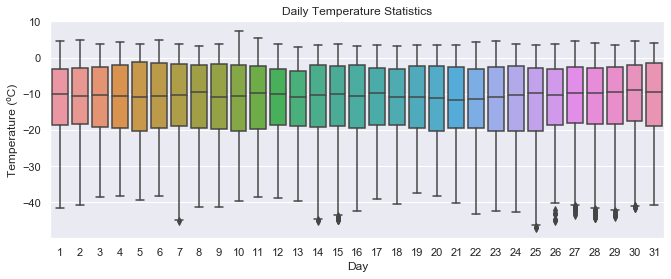

In [555]:
# Next, let’s group the temperature time series by day of the week, to explore weekly seasonality.

# Daily Temperature Statistics
ax2 = sns.boxplot(data=data1, x='Day', y='Temp');
ax2.set_ylabel('Temperature (ºC)')
ax2.set_title('Daily Temperature Statistics')

# To save the figure
plt.savefig('Fig4 - Boxplot of Daily Temperatures @ KAN_M')

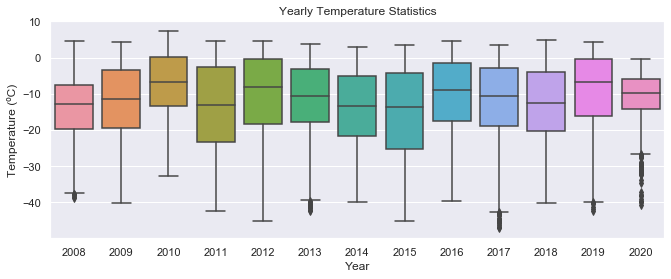

In [556]:
# Yearly Temperature Statistics:

ax3 = sns.boxplot(data=data1, x='Year', y='Temp');
ax3.set_ylabel('Temperature (ºC)')
ax3.set_title('Yearly Temperature Statistics')

# To save the figure
plt.savefig('Fig5 - Boxplot of Yearly Temperatures @ KAN_M')

In [563]:
# Frequencies

# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
times_sample

DatetimeIndex(['2013-02-03', '2013-02-06', '2013-02-08'], dtype='datetime64[ns]', freq=None)

In [564]:
# Select the specified dates and just the Consumption column
temp_sample = data1.loc[times_sample, ['Temp']].copy()
temp_sample

,Temp
Date,
2013-02-03,-19.47
2013-02-06,-10.34
2013-02-08,-23.55


In [565]:
# Check data1
data1

,Temp,Year,Month,Day,Hour
Date,,,,,
2008-09-02 00:00:00,NaN,2008,9,2,0
2008-09-02 01:00:00,NaN,2008,9,2,1
2008-09-02 02:00:00,NaN,2008,9,2,2
2008-09-02 03:00:00,NaN,2008,9,2,3
2008-09-02 04:00:00,NaN,2008,9,2,4
...,...,...,...,...,...
2020-05-05 19:00:00,-8.86,2020,5,5,19
2020-05-05 20:00:00,-10.68,2020,5,5,20
2020-05-05 21:00:00,-11.42,2020,5,5,21


In [566]:
data1.index

DatetimeIndex(['2008-09-02 00:00:00', '2008-09-02 01:00:00',
               '2008-09-02 02:00:00', '2008-09-02 03:00:00',
               '2008-09-02 04:00:00', '2008-09-02 05:00:00',
               '2008-09-02 06:00:00', '2008-09-02 07:00:00',
               '2008-09-02 08:00:00', '2008-09-02 09:00:00',
               ...
               '2020-05-05 14:00:00', '2020-05-05 15:00:00',
               '2020-05-05 16:00:00', '2020-05-05 17:00:00',
               '2020-05-05 18:00:00', '2020-05-05 19:00:00',
               '2020-05-05 20:00:00', '2020-05-05 21:00:00',
               '2020-05-05 22:00:00', '2020-05-05 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=100220, freq=None)

In [567]:
# Use "loc" function to check the specific date
data1.loc['2013-02-03']

,Temp,Year,Month,Day,Hour
Date,,,,,
2013-02-03 00:00:00,-19.47,2013,2,3,0
2013-02-03 01:00:00,-19.76,2013,2,3,1
2013-02-03 02:00:00,-20.17,2013,2,3,2
2013-02-03 03:00:00,-20.22,2013,2,3,3
2013-02-03 04:00:00,-20.74,2013,2,3,4
2013-02-03 05:00:00,-21.17,2013,2,3,5
2013-02-03 06:00:00,-21.22,2013,2,3,6
2013-02-03 07:00:00,-21.31,2013,2,3,7
2013-02-03 08:00:00,-21.24,2013,2,3,8


In [568]:
# Resampling

In [569]:
# Specify the data columns we want to include (i.e. exclude Temp)
data_columns = ['Temp']

# Resample to weekly frequency, aggregating with mean
data1_weekly_mean = data1[data_columns].resample('W').mean()
data1_weekly_mean.head(3)

,Temp
Date,
2008-09-07,-0.911000
2008-09-14,-5.672738
2008-09-21,-8.893690


In [570]:
print(data1.shape[0])
print(data1_weekly_mean.shape[0])

100220
610


In [ ]:
# Let’s plot the hourly and weekly Temp time series together over a single 12-month period to compare them.

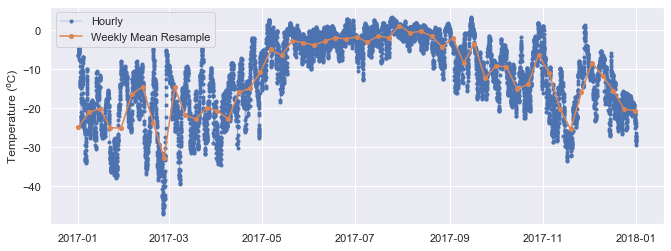

In [573]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-12'

# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(data1.loc[start:end, 'Temp'],
marker='.', linestyle='-', linewidth=0.3, label='Hourly')
ax.plot(data1_weekly_mean.loc[start:end, 'Temp'],
marker='o', markersize=4, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature (ºC)')
ax.legend();
plt.savefig('Fig6 - Hourly and weekly mean Temp @ KAN_M')

In [574]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data


# How to compute Averages
# Daily averages are calculated from hourly averages if > 20 values are available.
# Monthly averages are calculated from daily averages if > 24 values are available.

In [575]:
# Resample getting a several statistics parameters - Daily data
daily = data1['Temp'].resample('D').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
daily['Year'] = daily.index.year
daily['Month'] = daily.index.month
daily['Day'] = daily.index.day
daily

,mean,std,count,median,min,max,Year,Month,Day
Date,,,,,,,,,
2008-09-02,1.394000,0.331736,10,1.315,0.92,1.85,2008,9,2
2008-09-03,-0.239583,0.722276,24,-0.340,-1.44,0.95,2008,9,3
2008-09-04,-1.321667,0.615373,24,-1.345,-2.46,-0.04,2008,9,4
2008-09-05,0.427500,1.310713,24,0.775,-1.88,1.97,2008,9,5
2008-09-06,-0.830000,1.029508,24,-0.965,-2.96,0.76,2008,9,6
...,...,...,...,...,...,...,...,...,...
2020-05-01,-9.559583,2.594363,24,-9.880,-13.39,-5.48,2020,5,1
2020-05-02,-9.330000,3.934791,24,-9.580,-14.24,-4.11,2020,5,2
2020-05-03,-4.595000,1.018571,24,-4.680,-6.62,-2.81,2020,5,3


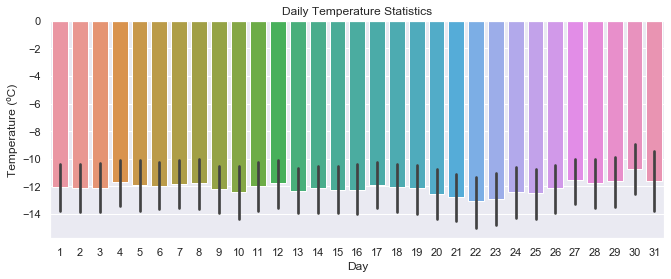

In [576]:
# Plot of box plots of daily data:
Fig4a = sns.barplot(x="Day", y="mean", data=daily)
Fig4a.set_ylabel('Temperature (ºC)')
Fig4a.set_title('Daily Temperature Statistics')

plt.savefig('Fig4A - Mean Daily Temperatures @ KAN_M')

In [577]:
# Add a collumn to the dataset regarding if the data is valid or nort (minimum number of datapoints):
import numpy as np

daily['valid']=np.where(daily['count'] >= 21,daily['count'], 'Not Valid')
print(daily)

# Writing and saving file with all data
daily_sel = daily
output_daily_sel = 'Daily_Stats.csv'
daily.to_csv(output_daily_sel, sep=',')

                 mean       std  count  median    min   max  Year  Month  Day  \
Date                                                                            
2008-09-02   1.394000  0.331736     10   1.315   0.92  1.85  2008      9    2   
2008-09-03  -0.239583  0.722276     24  -0.340  -1.44  0.95  2008      9    3   
2008-09-04  -1.321667  0.615373     24  -1.345  -2.46 -0.04  2008      9    4   
2008-09-05   0.427500  1.310713     24   0.775  -1.88  1.97  2008      9    5   
2008-09-06  -0.830000  1.029508     24  -0.965  -2.96  0.76  2008      9    6   
...               ...       ...    ...     ...    ...   ...   ...    ...  ...   
2020-05-01  -9.559583  2.594363     24  -9.880 -13.39 -5.48  2020      5    1   
2020-05-02  -9.330000  3.934791     24  -9.580 -14.24 -4.11  2020      5    2   
2020-05-03  -4.595000  1.018571     24  -4.680  -6.62 -2.81  2020      5    3   
2020-05-04  -8.012500  1.883014     24  -7.130 -12.00 -5.49  2020      5    4   
2020-05-05 -13.020833  4.023

In [578]:
# Selecting valid and non-valid data

daily_valid = daily['mean'].loc[daily['valid'] != 'Not Valid']

In [579]:
daily_valid

Date
2008-09-03    -0.239583
2008-09-04    -1.321667
2008-09-05     0.427500
2008-09-06    -0.830000
2008-09-07    -3.551667
                ...    
2020-05-01    -9.559583
2020-05-02    -9.330000
2020-05-03    -4.595000
2020-05-04    -8.012500
2020-05-05   -13.020833
Name: mean, Length: 3860, dtype: float64

In [580]:
# Selecting Non-Valid data (less than 21 hourly values):

daily_NV = daily['mean'].loc[daily['valid'] == 'Not Valid']
daily_NV

Date
2008-09-02     1.394000
2013-12-03   -30.773333
2013-12-04          NaN
2013-12-05          NaN
2013-12-06   -21.966667
                ...    
2020-04-04   -22.440000
2020-04-05   -20.220000
2020-04-06   -24.510000
2020-04-07   -19.820000
2020-04-08          NaN
Name: mean, Length: 404, dtype: float64

In [582]:
# We now have generated 2 data series (with valid and non valid daily data)

Legend:
Green - valid data (> 21 hourly values)
Red - Non valid data (<= 20 hourly values)


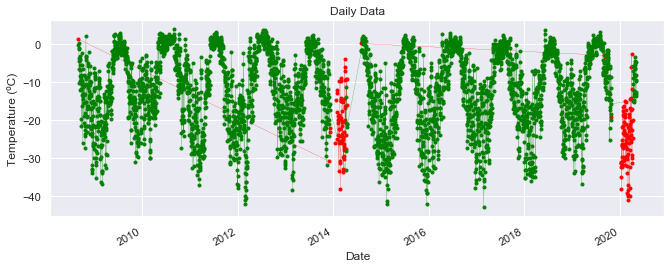

In [584]:
# Example plot of daily data
ax1 = daily_NV.plot(color='red', marker='.', linewidth=0.2, label='Non Valid')
ax1 = daily_valid.plot(color='green', marker='.', linewidth=0.2, label='Valid')
ax1.set_ylabel('Temperature (ºC)')
ax1.set_title('Daily Data')
plt.savefig('Fig7 - Valid and Non-valid Daily Mean Temp @ KAN_M') 

print('Legend:')
print('Green - valid data (> 21 hourly values)')
print('Red - Non valid data (<= 20 hourly values)')

In [585]:
# Percentage of Non valid Daily data

daily_p = len(daily_NV)/len(daily_valid)*100

print("The percentage of days with non valid data in the dataset is", round(daily_p, 1), "%." )

The percentage of days with non valid data in the dataset is 10.5 %.


In [595]:
# Resample getting a several statistics parameters - Monthly data
daily_V = daily[daily['valid']!='Non Valid']
monthly = daily['mean'].resample('M').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
monthly['Year'] = monthly.index.year
monthly['Month'] = monthly.index.month
monthly

# ALERT: It is needed to correct the monthly mean to be calculated ONLY from valid daily data!

,mean,std,count,median,min,max,Year,Month
Date,,,,,,,,
2008-09-30,-7.031328,5.344756,29,-6.688333,-21.345417,1.394000,2008,9
2008-10-31,-13.618118,7.112704,31,-13.146250,-27.263333,2.285000,2008,10
2008-11-30,-13.588278,6.141777,30,-13.804792,-23.535417,-1.907500,2008,11
2008-12-31,-20.143226,7.537311,31,-19.372500,-33.917083,-7.486250,2008,12
2009-01-31,-18.512809,8.251421,31,-17.562083,-35.132083,-6.197500,2009,1
...,...,...,...,...,...,...,...,...
2020-01-31,-26.795200,5.971946,25,-27.250000,-38.000000,-16.210000,2020,1
2020-02-29,-25.891724,6.549439,29,-25.030000,-39.700000,-14.910000,2020,2
2020-03-31,-23.308387,9.429363,31,-22.220000,-40.800000,-2.380000,2020,3


In [588]:
# Check the month with highest and lowest temperatures:


In [589]:
# To do!

In [596]:
# Evaluate if monthly data is valid or not
# Monthly averages are calculated from daily averages if > 24 values are available.

monthly['valid']=np.where(monthly['count'] >= 25, monthly['count'], 'Not Valid')
print(monthly)

# 5. Writing and saving file with all data
monthly_sel = monthly
output_monthly_sel = 'Monthly_Stats.csv'
monthly.to_csv(output_monthly_sel, sep=',')

                 mean       std  count     median        min        max  Year  \
Date                                                                            
2008-09-30  -7.031328  5.344756     29  -6.688333 -21.345417   1.394000  2008   
2008-10-31 -13.618118  7.112704     31 -13.146250 -27.263333   2.285000  2008   
2008-11-30 -13.588278  6.141777     30 -13.804792 -23.535417  -1.907500  2008   
2008-12-31 -20.143226  7.537311     31 -19.372500 -33.917083  -7.486250  2008   
2009-01-31 -18.512809  8.251421     31 -17.562083 -35.132083  -6.197500  2009   
...               ...       ...    ...        ...        ...        ...   ...   
2020-01-31 -26.795200  5.971946     25 -27.250000 -38.000000 -16.210000  2020   
2020-02-29 -25.891724  6.549439     29 -25.030000 -39.700000 -14.910000  2020   
2020-03-31 -23.308387  9.429363     31 -22.220000 -40.800000  -2.380000  2020   
2020-04-30 -13.289784  7.989883     29 -12.187083 -31.250000  -3.270833  2020   
2020-05-31  -8.903583  3.038

Legend:
Green - valid data (> 24 hourly values)
Red - Non valid data (<= 24 hourly values)


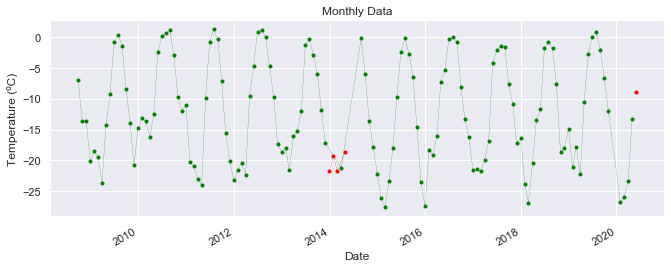

In [597]:
# Selecting valid and non-valid data

monthly_valid = monthly['mean'].loc[monthly['valid'] != 'Not Valid']
monthly_NV = monthly['mean'].loc[monthly['valid'] == 'Not Valid']

# Example plot of monthly data
Fig8 = monthly_NV.plot(color='red', marker='.', linewidth=0.2, label='Non Valid')
Fig8 = monthly_valid.plot(color='green', marker='.', linewidth=0.2, label='Valid')
Fig8.set_ylabel('Temperature (ºC)')
Fig8.set_title('Monthly Data')
plt.savefig('Fig8 - Valid and Non-valid Monthly Mean Temp @ KAN_M') 

print('Legend:')
print('Green - valid data (> 24 hourly values)')
print('Red - Non valid data (<= 24 hourly values)')

In [598]:
# Percentage of Non valid Monthly data

monthly_p = len(monthly_NV)/len(monthly_valid)*100

print("The percentage of months with non valid data in the dataset is", round(monthly_p,1), "%." )

The percentage of months with non valid data in the dataset is 7.6 %.


In [600]:
monthly['mean'].describe()

count    136.000000
mean     -12.267506
std        8.486535
min      -27.649598
25%      -19.549824
50%      -13.391557
75%       -3.908140
max        1.258898
Name: mean, dtype: float64

In [601]:
monthly['mean'].min()

-27.64959821428571

In [614]:
# Check the warmest and coldest months
x = monthly.sort_values(by="mean", ascending=False).head(10)
print("The warmest months were:", x)

y = monthly.sort_values(by="mean", ascending=False).tail(10)
print("The coldest months were:", y)

The warmest months were:                 mean       std  count    median       min       max  Year  \
Date                                                                        
2011-07-31  1.258898  1.119934     31  1.347083 -0.924167  3.398750  2011   
2012-07-31  1.219906  1.197466     31  1.220000 -1.259583  3.736667  2012   
2010-08-31  1.135027  0.493380     31  1.061250  0.090000  2.164583  2010   
2012-06-30  0.854944  1.342821     30  1.491458 -1.806667  2.319583  2012   
2019-07-31  0.796976  1.251888     31  1.040833 -2.865000  3.153333  2019   
2010-07-31  0.746855  1.108676     31  1.026250 -1.513750  2.688750  2010   
2009-07-31  0.365874  1.837196     31  0.744583 -2.892500  3.031667  2009   
2010-06-30  0.241069  1.509906     30  0.410000 -2.996250  2.646667  2010   
2019-06-30  0.069958  1.386777     30  0.631042 -2.714583  2.432500  2019   
2016-07-31  0.049019  1.029888     31 -0.039167 -2.112917  1.977083  2016   

            Month valid  
Date                    

In [615]:
# Resample getting a several statistics parameters - Yearly data
# Considering the valid years only with data for 12 months

yearly= monthly['mean'].resample('Y').agg(['mean', 'std', 'count', 'median', 'min', 'max'])
yearly['valid']=np.where(yearly['count'] == 12, yearly['count'], 'Not Valid')
print(yearly)

print('Condition for a yearly mean: 12 months included)')

                 mean        std  count     median        min       max  \
Date                                                                      
2008-12-31 -13.595237   5.352932      4 -13.603198 -20.143226 -7.031328   
2009-12-31 -12.069061   8.184230     12 -14.056131 -23.621909  0.365874   
2010-12-31  -7.628232   6.448875     12 -10.342964 -16.280282  1.135027   
2011-12-31 -13.640180   9.769385     12 -17.817045 -24.005056  1.258898   
2012-12-31 -10.586325   9.130979     12  -9.675351 -22.351263  1.219906   
2013-12-31 -12.010010   7.688723     12 -13.624518 -21.804821 -0.318965   
2014-12-31 -15.628055   7.700037      9 -18.730953 -22.144301 -0.182198   
2015-12-31 -15.168621  10.527702     12 -16.325845 -27.649598 -0.122876   
2016-12-31 -10.527145   7.876843     12 -10.709008 -21.535134  0.049019   
2017-12-31 -11.798840   8.068663     12 -13.681001 -21.734315 -1.440161   
2018-12-31 -13.326242   8.834428     12 -14.194352 -26.888080 -0.737634   
2019-12-31  -9.410288   8

In [617]:
# Check the warmest and coldest years
x1 = yearly.sort_values(by="mean", ascending=False).head(3)
print("The warmest years wwere:", x1)

y1 = yearly.sort_values(by="mean", ascending=False).tail(3)
print("The coldest years were:", y1)

The warmest years wwere:                  mean       std  count     median        min       max  \
Date                                                                     
2010-12-31  -7.628232  6.448875     12 -10.342964 -16.280282  1.135027   
2019-12-31  -9.410288  8.717789     10  -8.534315 -22.289906  0.796976   
2016-12-31 -10.527145  7.876843     12 -10.709008 -21.535134  0.049019   

                valid  
Date                   
2010-12-31         12  
2019-12-31  Not Valid  
2016-12-31         12  
The coldest years were:                  mean        std  count     median        min       max  \
Date                                                                      
2015-12-31 -15.168621  10.527702     12 -16.325845 -27.649598 -0.122876   
2014-12-31 -15.628055   7.700037      9 -18.730953 -22.144301 -0.182198   
2020-12-31 -19.637736   8.051923      5 -23.308387 -26.795200 -8.903583   

                valid  
Date                   
2015-12-31         12  
2014-12-31  

In [618]:
# Writing and saving file with all data
yearly_sel =yearly

# This final csv file will have 8 different collumns: 

output_yearly_sel = 'Yearly_Stats.csv'

# Save dataframe to csv
yearly.to_csv(output_yearly_sel, sep=',')

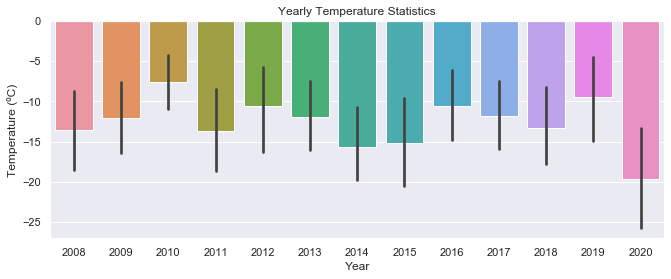

In [619]:
# Bar plot of yearly data:

Fig9 = sns.barplot(x="Year", y="mean", data=monthly)
Fig9.set_ylabel('Temperature (ºC)')
Fig9.set_title('Yearly Temperature Statistics')
plt.savefig('Fig9 - Bar plot Yeaarly Temp @ KAN_M') 

Legend:
Green - valid data (12 months)
Red - Non valid data (less than 12 months)


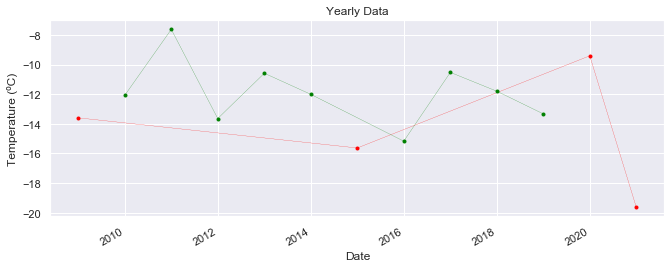

In [623]:
# Selecting valid and non-valid data

yearly_valid = yearly['mean'].loc[yearly['valid'] != 'Not Valid']
yearly_NV = yearly['mean'].loc[yearly['valid'] == 'Not Valid']

# Example plot of yearly data
Fig10 = yearly_NV.plot(color='red', marker='.', linewidth=0.2, label='Non Valid')
Fig10 = yearly_valid.plot(color='green', marker='.', linewidth=0.2, label='Valid')
Fig10.set_ylabel('Temperature (ºC)')
Fig10.set_title('Yearly Data')
plt.savefig('Fig10 - Valid and Non-valid Yearly Mean Temp @ KAN_M') 

print('Legend:')
print('Green - valid data (12 months)')
print('Red - Non valid data (less than 12 months)')

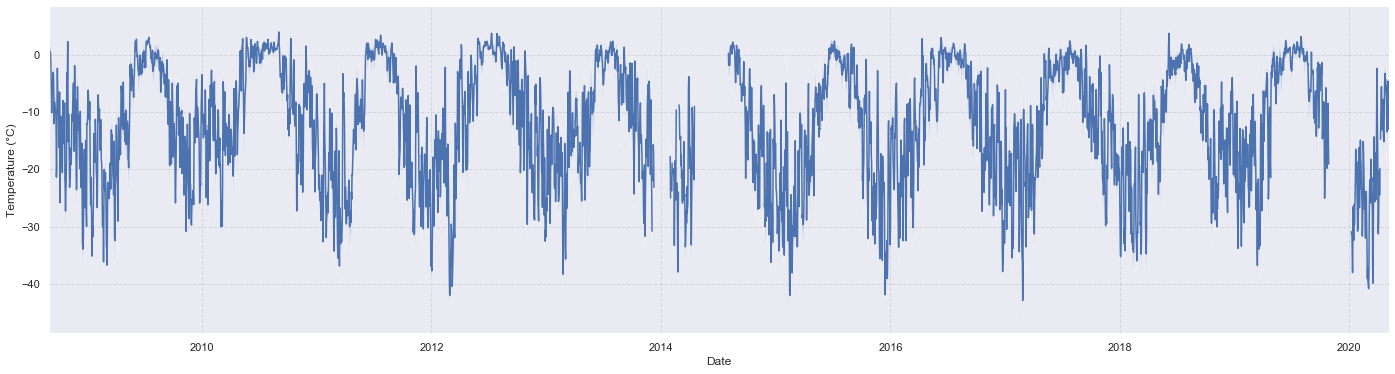

In [625]:
# Daily plot (Mean + SD) - All data

ax = daily['mean'].plot(figsize=(24, 6))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.1)
ax.fill_between(daily.index, daily['mean'] - daily['std'], daily['mean'] + daily['std'], alpha=.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
sns.despine()
plt.savefig('Fig11 - Daily Mean Temp - all data @ KAN_M') 

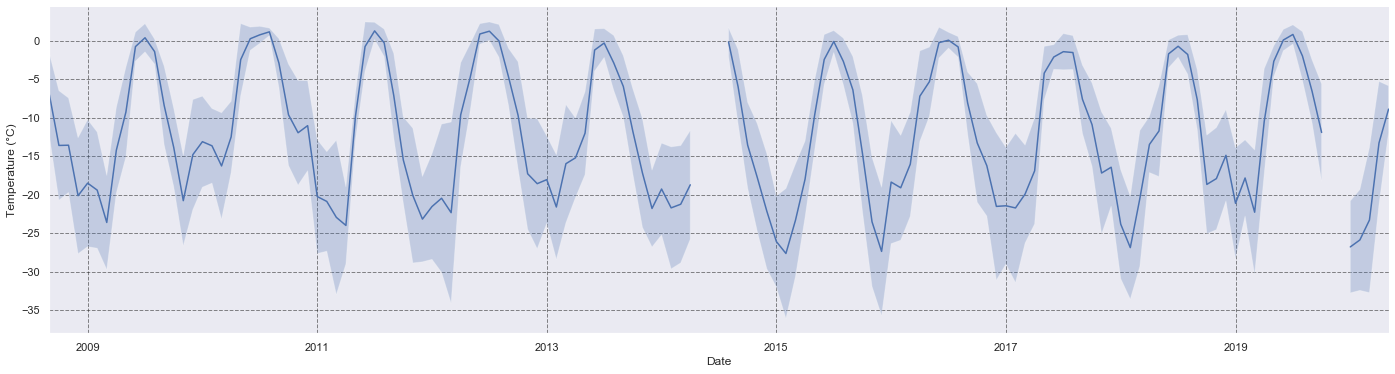

In [627]:
# Monthly plot (Mean + SD) - All data

ax = monthly['mean'].plot(figsize=(24, 6))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(monthly.index, monthly['mean'] - monthly['std'], monthly['mean'] + monthly['std'], alpha=.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
sns.despine()
plt.savefig('Fig12 - Monthly Mean Temp - all data @ KAN_M') 

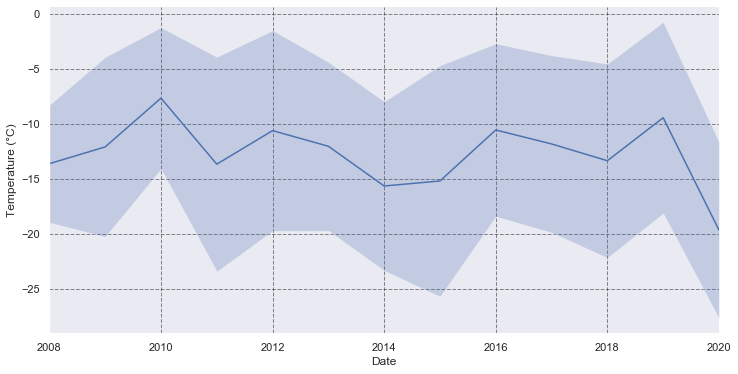

In [628]:
# Yearly plot (Mean + SD) - All data

ax = yearly['mean'].plot(figsize=(12, 6))
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.5)
ax.fill_between(yearly.index, yearly['mean'] - yearly['std'], yearly['mean'] + yearly['std'], alpha=.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
sns.despine()
plt.savefig('Fig13 - Monthly Mean Temp - all data @ KAN_M')

In [629]:
# Checking for Stationarity

In [630]:
daily.head()

,mean,std,count,median,min,max,Year,Month,Day,valid
Date,,,,,,,,,,
2008-09-02,1.394000,0.331736,10,1.315,0.92,1.85,2008,9,2,Not Valid
2008-09-03,-0.239583,0.722276,24,-0.340,-1.44,0.95,2008,9,3,24
2008-09-04,-1.321667,0.615373,24,-1.345,-2.46,-0.04,2008,9,4,24
2008-09-05,0.427500,1.310713,24,0.775,-1.88,1.97,2008,9,5,24
2008-09-06,-0.830000,1.029508,24,-0.965,-2.96,0.76,2008,9,6,24


In [631]:
# Dickey-Fuller test to evaluation the stationarity of the data

In [632]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [639]:
daily_s = pd.read_csv("Daily_Stats.csv", delimiter=",", usecols=['Date','mean'], na_values=['-999.0'],header=0, index_col=0)
daily_s

,mean
Date,
2008-09-02,1.394000
2008-09-03,-0.239583
2008-09-04,-1.321667
2008-09-05,0.427500
2008-09-06,-0.830000
...,...
2020-05-01,-9.559583
2020-05-02,-9.330000
2020-05-03,-4.595000


In [640]:
# Erase NaN values:
series=daily_s.dropna()
series

,mean
Date,
2008-09-02,1.394000
2008-09-03,-0.239583
2008-09-04,-1.321667
2008-09-05,0.427500
2008-09-06,-0.830000
...,...
2020-05-01,-9.559583
2020-05-02,-9.330000
2020-05-03,-4.595000


In [641]:
X = series.values

In [642]:
result = adfuller(X)

In [643]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.131680
p-value: 0.000012
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [644]:
# How to interpret the Augmented Dickey-Fuller Test to check the how strongly a time series is defined by a trend.
# The null hypothesis is that the time series is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary (or does not have time-dependent structure).
# p-value below 0.05 -> Reject the null hypothesis (i.e.,time series is stationary)

# Stationarity
# A stationary time series is one in which several statistical properties — namely the mean, variance, and covariance — do not vary with time. 
# This means that, although the values can change with time, the way the series itself changes with time does not change over time.

In [645]:
dftest = adfuller(X, autolag='aic')

In [646]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput['p-value'] < 0.05:
    print('The time series is stationary.')
else:
    print('The time series is NOT stationary.') 

Test Statistic                   -5.131680
p-value                           0.000012
#Lags Used                       18.000000
Number of Observations Used    4006.000000
Critical Value (1%)              -3.431983
Critical Value (5%)              -2.862262
Critical Value (10%)             -2.567154
dtype: float64
The time series is stationary.


In [647]:
# Average increasing rates

# source: https://aetperf.github.io/2018/05/24/Pandas-Time-Series-example-with-some-historical-land-temperatures.html

In [653]:
series1 = pd.read_csv("Daily_Stats.csv", delimiter=",", usecols=['Date','mean'], na_values=['-999.0'], header=0)
series1=series1.dropna()
series1

,Date,mean
0,2008-09-02,1.394000
1,2008-09-03,-0.239583
2,2008-09-04,-1.321667
3,2008-09-05,0.427500
4,2008-09-06,-0.830000
...,...,...
4259,2020-05-01,-9.559583
4260,2020-05-02,-9.330000
4261,2020-05-03,-4.595000
4262,2020-05-04,-8.012500


In [654]:
series1['Date']=pd.to_datetime(series1['Date'])
series1

,Date,mean
0,2008-09-02,1.394000
1,2008-09-03,-0.239583
2,2008-09-04,-1.321667
3,2008-09-05,0.427500
4,2008-09-06,-0.830000
...,...,...
4259,2020-05-01,-9.559583
4260,2020-05-02,-9.330000
4261,2020-05-03,-4.595000
4262,2020-05-04,-8.012500


In [656]:
series1.set_index('Date', drop=False, inplace=True)
series1

,Date,mean
Date,,
2008-09-02,2008-09-02,1.394000
2008-09-03,2008-09-03,-0.239583
2008-09-04,2008-09-04,-1.321667
2008-09-05,2008-09-05,0.427500
2008-09-06,2008-09-06,-0.830000
...,...,...
2020-05-01,2020-05-01,-9.559583
2020-05-02,2020-05-02,-9.330000
2020-05-03,2020-05-03,-4.595000


In [657]:
series1['jDate']= series1['Date'].map(pd.Timestamp.to_julian_date)

In [658]:
series1['const'] = 1.0
#epoch = pd.to_datetime(0, unit='d').to_julian_date()
#df_france['Date2'] = pd.to_datetime(df_france['jDate']- epoch, unit='D')
series1

,Date,mean,jDate,const
Date,,,,
2008-09-02,2008-09-02,1.394000,2454711.5,1.0
2008-09-03,2008-09-03,-0.239583,2454712.5,1.0
2008-09-04,2008-09-04,-1.321667,2454713.5,1.0
2008-09-05,2008-09-05,0.427500,2454714.5,1.0
2008-09-06,2008-09-06,-0.830000,2454715.5,1.0
...,...,...,...,...
2020-05-01,2020-05-01,-9.559583,2458970.5,1.0
2020-05-02,2020-05-02,-9.330000,2458971.5,1.0
2020-05-03,2020-05-03,-4.595000,2458972.5,1.0


In [660]:
import statsmodels.api as sm
mod = sm.OLS(series1['mean'], series1[['jDate', 'const']])
res = mod.fit()
print(res.summary())
series1['pred'] = res.predict(series1[['jDate', 'const']])

                            OLS Regression Results                            
Dep. Variable:                   mean   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     9.508
Date:                Tue, 09 Jun 2020   Prob (F-statistic):            0.00206
Time:                        11:43:01   Log-Likelihood:                -15068.
No. Observations:                4025   AIC:                         3.014e+04
Df Residuals:                    4023   BIC:                         3.015e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
jDate         -0.0004      0.000     -3.084      0.0

In [661]:
print('Temperature change per year: ', res.params[0]*365.0,'ºC')

Temperature change per year:  -0.1465935697713387 ºC


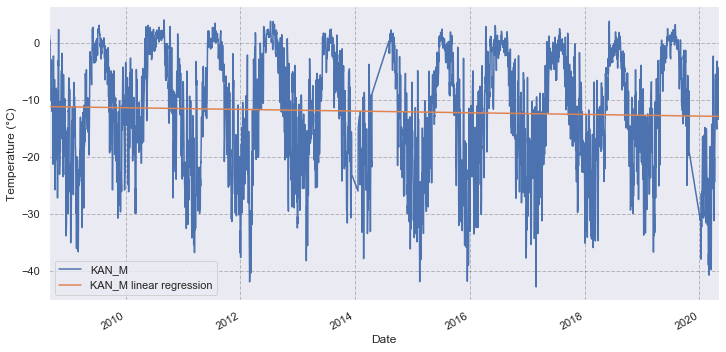

In [680]:
# Plot of temperature change per year

series1['mean'].plot(figsize=(12, 6), label='KAN_M')
series1.pred.plot(label='KAN_M linear regression')
ax = plt.gca()
ax.grid(color= (0.1, 0.1, 0.1), linestyle='--', linewidth=1, alpha=0.25)
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel("Temperature (°C)")
plt.legend()
sns.despine()
plt.savefig('Fig14 - Temperature chaner per year (linear regression) @ KAN_M')

In [675]:
from pandas import Grouper
from pandas import DataFrame


series2 = pd.read_csv("Monthly_Stats.csv", delimiter=",", usecols=['Date','mean'], na_values=['-999.0'], header=0,squeeze=True)
series2['Date']=pd.to_datetime(series2['Date'])


series2

,Date,mean
0,2008-09-30,-7.031328
1,2008-10-31,-13.618118
2,2008-11-30,-13.588278
3,2008-12-31,-20.143226
4,2009-01-31,-18.512809
...,...,...
136,2020-01-31,-26.795200
137,2020-02-29,-25.891724
138,2020-03-31,-23.308387
139,2020-04-30,-13.289784


In [676]:
series2 = series2.set_index('Date')

In [677]:
series2['Year'] = series2.index.year
series2['Month'] = series2.index.month
series2['Day'] = series2.index.day
series2

,mean,Year,Month,Day
Date,,,,
2008-09-30,-7.031328,2008,9,30
2008-10-31,-13.618118,2008,10,31
2008-11-30,-13.588278,2008,11,30
2008-12-31,-20.143226,2008,12,31
2009-01-31,-18.512809,2009,1,31
...,...,...,...,...
2020-01-31,-26.795200,2020,1,31
2020-02-29,-25.891724,2020,2,29
2020-03-31,-23.308387,2020,3,31


In [678]:
# Transpose the dataset:

series3 = pd.pivot_table(series2, index = 'Year', columns = 'Month', values = 'mean') 
series3

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.031328,-13.618118,-13.588278,-20.143226
2009,-18.512809,-19.421146,-23.621909,-14.238903,-9.288374,-0.783056,0.365874,-1.431183,-8.421167,-13.873360,-20.790264,-14.812433
2010,-13.129247,-13.665551,-16.280282,-12.519139,-2.477728,0.241069,0.746855,1.135027,-2.935583,-9.638790,-11.968278,-11.047137
2011,-20.250820,-20.889613,-22.957715,-24.005056,-9.820847,-0.778597,1.258898,-0.292957,-7.123431,-15.505188,-20.128903,-23.187930
2012,-21.552984,-20.472514,-22.351263,-9.637181,-4.743562,0.854944,1.219906,-0.041371,-4.718139,-9.713522,-17.297333,-18.582876
2013,-18.056452,-21.613437,-15.988172,-15.223929,-12.025108,-1.229528,-0.318965,-2.901707,-5.956111,-11.809987,-17.191903,-21.804821
2014,-19.277667,-21.725179,-21.252902,-18.730953,NaN,NaN,NaN,-0.182198,-5.994069,-13.585806,-17.759417,-22.144301
2015,-26.097151,-27.649598,-23.322298,-17.997833,-9.691586,-2.461583,-0.122876,-2.697648,-6.411917,-14.653858,-23.536722,-27.380376
2016,-18.377755,-19.114928,-16.049516,-7.218875,-5.332782,-0.264542,0.049019,-0.819140,-8.126417,-13.291599,-16.244069,-21.535134


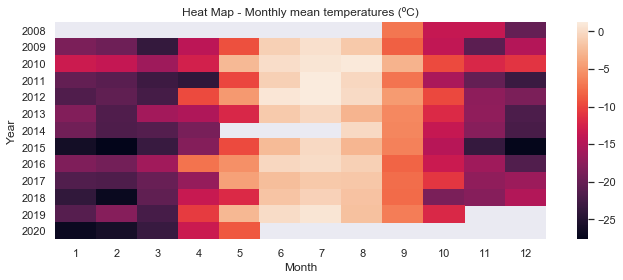

In [683]:
Fig15 = sns.heatmap(series3)
Fig15.set_title('Heat Map - Monthly mean temperatures (ºC)')
plt.savefig('Fig15 - Heat Map - Monthly T @ KAN_M')

In [ ]:
# HeatMap for daily temperatures

In [692]:
series4 = pd.read_csv("Daily_Stats.csv", delimiter=",", usecols=['Date','mean'], na_values=['-999.0'], header=0,squeeze=True)
series4['Date']=pd.to_datetime(series4['Date'])
series4['day_of_year'] = series4['Date'].dt.dayofyear


In [693]:
series4 = series4.set_index('Date')
series4

,mean,day_of_year
Date,,
2008-09-02,1.394000,246
2008-09-03,-0.239583,247
2008-09-04,-1.321667,248
2008-09-05,0.427500,249
2008-09-06,-0.830000,250
...,...,...
2020-05-01,-9.559583,122
2020-05-02,-9.330000,123
2020-05-03,-4.595000,124


In [694]:
series4['Year'] = series4.index.year

series4

,mean,day_of_year,Year
Date,,,
2008-09-02,1.394000,246,2008
2008-09-03,-0.239583,247,2008
2008-09-04,-1.321667,248,2008
2008-09-05,0.427500,249,2008
2008-09-06,-0.830000,250,2008
...,...,...,...
2020-05-01,-9.559583,122,2020
2020-05-02,-9.330000,123,2020
2020-05-03,-4.595000,124,2020


In [695]:
series5 = pd.pivot_table(series4, index = 'Year', columns = 'day_of_year', values = 'mean') 
series5

day_of_year,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
Year,,,,,,,,,,,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-16.507500,-26.059583,-26.707500,-26.527917,-14.952917,-15.509583,-27.416250,-29.961250,-11.960417,-12.118750
2009,-11.535833,-7.530417,-6.197500,-7.410417,-9.100417,-8.662083,-11.332083,-8.195417,-15.582500,-21.717083,...,-19.075000,-25.884167,-23.345833,-22.190833,-22.855000,-14.785833,-8.907917,-6.709167,-3.490000,NaN
2010,-6.812500,-10.067500,-11.944583,-11.280833,-14.511667,-12.311667,-10.396250,-13.242083,-13.912083,-13.400000,...,-12.570417,-11.371667,-20.126667,-23.943750,-18.575417,-17.466250,-14.787917,-12.604583,-6.992917,NaN
2011,-6.846250,-7.265000,-10.665417,-12.004167,-14.560833,-17.651250,-23.430000,-23.463333,-20.996250,-24.688750,...,-21.857083,-26.096250,-26.410000,-20.350833,-20.057500,-22.560000,-26.332917,-36.847083,-33.016250,NaN
2012,-36.868750,-37.706667,-34.703750,-31.000000,-23.489583,-17.860417,-18.778333,-20.620417,-29.892500,-22.446250,...,-14.154583,-16.540417,-21.952083,-27.980000,-17.957917,-25.061250,-32.536250,-30.555000,-31.824167,-31.075000
2013,-24.984583,-27.260417,-20.587083,-13.027917,-19.039583,-24.355833,-15.000833,-14.623333,-10.808333,-16.825417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-22.267917,-14.733333,-16.442917,-19.917500,-6.971667,-9.067500,-12.549583,-18.529583,-15.449583,NaN
2015,-18.792083,-23.606250,-23.738750,-25.050833,-26.956250,-31.184167,-29.362500,-26.399583,-28.492917,-31.514167,...,-36.257083,-27.932083,-13.410000,-11.539583,-15.480833,-20.725000,-24.500417,-28.340833,-33.133750,NaN
2016,-30.425000,-17.280000,-12.781667,-12.677500,-13.649167,-12.325833,-14.658750,-11.016250,-17.158333,-19.548333,...,-33.430417,-37.809583,-36.333333,-35.647083,-28.937917,-29.627083,-30.720417,-32.875000,-30.922500,-14.610833


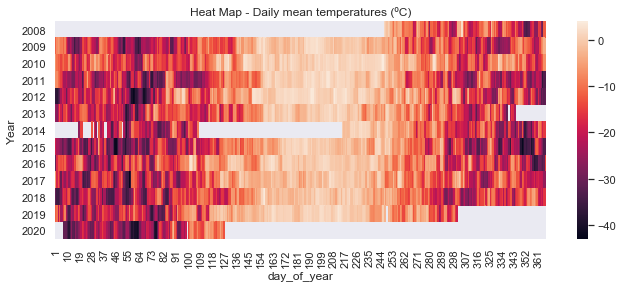

In [696]:
Fig16 = sns.heatmap(series5)
Fig16.set_title('Heat Map - Daily mean temperatures (ºC)')
plt.savefig('Fig16 - Heat Map - Daily T @ KAN_M')